In [1]:
import glob
import time

import pandas as pd
import seaborn as sns


In [2]:
data_files = glob.glob("*/results/*.csv")

In [3]:
df_github_names_long = pd.concat(
    [ pd.read_csv(fp) for fp in data_files], 
    axis=0, 
    keys=data_files, 
    names=["source", "row"]
).reset_index("source").reset_index(drop=True)
df_github_names_long

,source,github_user_id,uu_user_id
0,github_search\results\ids_search_repos.csv,jonasmoons,NaN
1,github_search\results\ids_search_repos.csv,gglucass,NaN
2,github_search\results\ids_search_repos.csv,MarcelRobeer,NaN
3,github_search\results\ids_search_repos.csv,ekatrukha,NaN
4,github_search\results\ids_search_repos.csv,UtrechtUniversity,NaN
...,...,...,...
541,university_profile_pages\results\employees_git...,J535D165,JdeBruin1
542,university_profile_pages\results\employees_git...,asreview,JdeBruin1
543,university_profile_pages\results\employees_git...,zievathustra,JASieverink
544,university_profile_pages\results\employees_git...,Southparkfan,FTufan


In [4]:
df_github_names_crosstab = pd.crosstab(df_github_names_long["github_user_id"], df_github_names_long["source"])
df_github_names_crosstab

source,github_search\results\ids_search_repos.csv,github_search\results\ids_search_users.csv,github_search\results\ids_topic_repos.csv,pure\results\ids_pure_users.csv,university_profile_pages\results\employees_github_usernames.csv
github_user_id,,,,,
19giorgosts,0,1,0,0,0
4009509,0,1,0,0,0
73616e646572,0,0,0,0,1
AJueling,1,1,0,0,0
ARYENN,0,1,0,0,0
...,...,...,...,...,...
yaikohi,0,1,0,0,0
ydluo,0,0,0,1,0
ystouthart,1,0,1,0,0


In [5]:
df_github_names_crosstab["sum_github"] = df_github_names_crosstab["github_search/results/ids_search_repos.csv"] + df_github_names_crosstab["github_search/results/ids_search_users.csv"] +   df_github_names_crosstab["github_search/results/ids_topic_repos.csv"]
df_github_names_crosstab["sum_university_profile_pages"] = df_github_names_crosstab["university_profile_pages/results/employees_github_from_cv_urls.csv"] + df_github_names_crosstab["university_profile_pages/results/employees_github_from_links_urls.csv"] + df_github_names_crosstab["university_profile_pages/results/employees_github_from_profile_urls.csv"]


KeyError: 'github_search/results/ids_search_repos.csv'

In [16]:
df_github_names_crosstab

source,github_search/results/ids_search_repos.csv,github_search/results/ids_search_users.csv,github_search/results/ids_topic_repos.csv,pure/results/ids_pure_users.csv,university_profile_pages/results/employees_github_from_cv_urls.csv,university_profile_pages/results/employees_github_from_links_urls.csv,university_profile_pages/results/employees_github_from_profile_urls.csv,sum_github,sum_university_profile_pages
github_user_id,,,,,,,,,
19giorgosts,0,1,0,0,0,0,0,1,0
4009509,0,1,0,0,0,0,0,1,0
73616e646572,0,0,0,0,0,1,0,0,1
AJueling,1,1,0,0,0,0,0,2,0
ARYENN,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
xavierpinho23,0,1,0,0,0,0,0,1,0
yaikohi,0,1,0,0,0,0,0,1,0
ydluo,0,0,0,1,0,0,0,0,0


source
github_search/results/ids_search_repos.csv                                 208
github_search/results/ids_search_users.csv                                 223
github_search/results/ids_topic_repos.csv                                   24
pure/results/ids_pure_users.csv                                             18
university_profile_pages/results/employees_github_from_cv_urls.csv           2
university_profile_pages/results/employees_github_from_links_urls.csv       29
university_profile_pages/results/employees_github_from_profile_urls.csv     19
sum_github                                                                 455
sum_university_profile_pages                                                50
dtype: int64


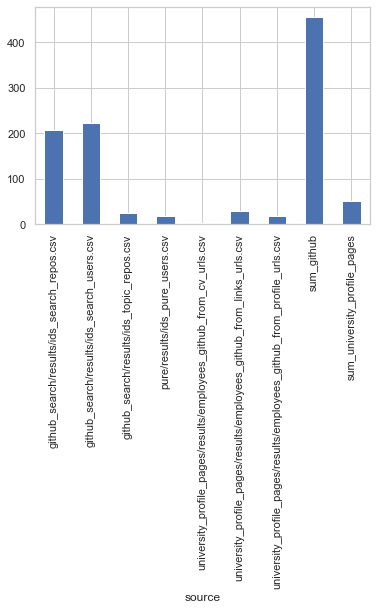

In [71]:
sum_columns = df_github_names_crosstab.sum(axis=0)
sum_columns.plot.bar()

print(sum_columns)

In [7]:
# unique_users_github = pd.read_csv('unique_users.csv')
unique_users_github = pd.read_excel('unique_users_annotated.xlsx')

In [8]:
unique_users_github

,github_user_id,uu_user_id,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,...,disk_usage,collaborators,two_factor_authentication,plan,is_student,is_employee,is_currently_employed,is_research_group,final_decision,note
0,ReinierMaas,NaN,9269254.0,MDQ6VXNlcjkyNjkyNTQ=,https://avatars.githubusercontent.com/u/926925...,NaN,https://api.github.com/users/ReinierMaas,https://github.com/ReinierMaas,https://api.github.com/users/ReinierMaas/follo...,https://api.github.com/users/ReinierMaas/follo...,...,NaN,NaN,NaN,NaN,False,0.0,0.0,0.0,0,NaN
1,rel=,AAKadu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,0,duplicate
2,jhellingman,NaN,8410715.0,MDQ6VXNlcjg0MTA3MTU=,https://avatars.githubusercontent.com/u/841071...,NaN,https://api.github.com/users/jhellingman,https://github.com/jhellingman,https://api.github.com/users/jhellingman/follo...,https://api.github.com/users/jhellingman/follo...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,0,NaN
3,LucaScorpion,NaN,5592716.0,MDQ6VXNlcjU1OTI3MTY=,https://avatars.githubusercontent.com/u/559271...,NaN,https://api.github.com/users/LucaScorpion,https://github.com/LucaScorpion,https://api.github.com/users/LucaScorpion/foll...,https://api.github.com/users/LucaScorpion/foll...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,0,NaN
4,FloatingPoint,NaN,1568174.0,MDQ6VXNlcjE1NjgxNzQ=,https://avatars.githubusercontent.com/u/156817...,NaN,https://api.github.com/users/FloatingPoint,https://github.com/FloatingPoint,https://api.github.com/users/FloatingPoint/fol...,https://api.github.com/users/FloatingPoint/fol...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,keesmulder,NaN,7806295.0,MDQ6VXNlcjc4MDYyOTU=,https://avatars.githubusercontent.com/u/780629...,NaN,https://api.github.com/users/keesmulder,https://github.com/keesmulder,https://api.github.com/users/keesmulder/followers,https://api.github.com/users/keesmulder/follow...,...,NaN,NaN,NaN,NaN,False,1.0,0.0,NaN,0,NaN
425,hanstimm,NaN,5745215.0,MDQ6VXNlcjU3NDUyMTU=,https://avatars.githubusercontent.com/u/574521...,NaN,https://api.github.com/users/hanstimm,https://github.com/hanstimm,https://api.github.com/users/hanstimm/followers,https://api.github.com/users/hanstimm/followin...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,0.0,0,Teacher at HKU
426,Jollyfant,NaN,10128244.0,MDQ6VXNlcjEwMTI4MjQ0,https://avatars.githubusercontent.com/u/101282...,NaN,https://api.github.com/users/Jollyfant,https://github.com/Jollyfant,https://api.github.com/users/Jollyfant/followers,https://api.github.com/users/Jollyfant/followi...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1,Unsure about this one - has a repo with UU tag...
427,growthcharts,NaN,70215749.0,MDEyOk9yZ2FuaXphdGlvbjcwMjE1NzQ5,https://avatars.githubusercontent.com/u/702157...,NaN,https://api.github.com/users/growthcharts,https://github.com/growthcharts,https://api.github.com/users/growthcharts/foll...,https://api.github.com/users/growthcharts/foll...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,1.0,1,What to do with this one. Researcher works als...


In [11]:
unique_users_github_filtered = unique_users_github[unique_users_github["final_decision"] == 1]

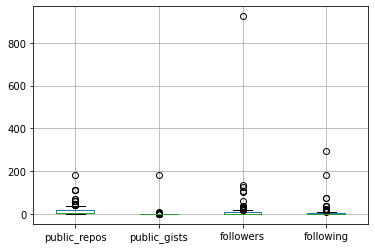

In [13]:
boxplot = unique_users_github_filtered.boxplot(column=['public_repos','public_gists', 'followers', 'following'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,github_user_id,uu_user_id,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,...,disk_usage,collaborators,two_factor_authentication,plan,is_student,is_employee,is_currently_employed,is_research_group,final_decision,note
69,brentp,NaN,1739.0,MDQ6VXNlcjE3Mzk=,https://avatars.githubusercontent.com/u/1739?v=4,NaN,https://api.github.com/users/brentp,https://github.com/brentp,https://api.github.com/users/brentp/followers,https://api.github.com/users/brentp/following{...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,UMC
84,UiL-OTS-labs,NaN,8588005.0,MDEyOk9yZ2FuaXphdGlvbjg1ODgwMDU=,https://avatars.githubusercontent.com/u/858800...,NaN,https://api.github.com/users/UiL-OTS-labs,https://github.com/UiL-OTS-labs,https://api.github.com/users/UiL-OTS-labs/foll...,https://api.github.com/users/UiL-OTS-labs/foll...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,1.0,1,NaN
44,CLARIAH,MMoatsos,15210767.0,MDEyOk9yZ2FuaXphdGlvbjE1MjEwNzY3,https://avatars.githubusercontent.com/u/152107...,NaN,https://api.github.com/users/CLARIAH,https://github.com/CLARIAH,https://api.github.com/users/CLARIAH/followers,https://api.github.com/users/CLARIAH/following...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,1.0,1,NaN
43,CLARIAH,MMoatsos,15210767.0,MDEyOk9yZ2FuaXphdGlvbjE1MjEwNzY3,https://avatars.githubusercontent.com/u/152107...,NaN,https://api.github.com/users/CLARIAH,https://github.com/CLARIAH,https://api.github.com/users/CLARIAH/followers,https://api.github.com/users/CLARIAH/following...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,1.0,1,NaN
62,UtrechtUniversity,NaN,11516575.0,MDEyOk9yZ2FuaXphdGlvbjExNTE2NTc1,https://avatars.githubusercontent.com/u/115165...,NaN,https://api.github.com/users/UtrechtUniversity,https://github.com/UtrechtUniversity,https://api.github.com/users/UtrechtUniversity...,https://api.github.com/users/UtrechtUniversity...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,1.0,1,NaN
10,cjvanlissa,CJvanLissa,11941251.0,MDQ6VXNlcjExOTQxMjUx,https://avatars.githubusercontent.com/u/119412...,NaN,https://api.github.com/users/cjvanlissa,https://github.com/cjvanlissa,https://api.github.com/users/cjvanlissa/followers,https://api.github.com/users/cjvanlissa/follow...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
50,UUDigitalHumanitieslab,SJJSpoel,7656260.0,MDEyOk9yZ2FuaXphdGlvbjc2NTYyNjA=,https://avatars.githubusercontent.com/u/765626...,NaN,https://api.github.com/users/UUDigitalHumaniti...,https://github.com/UUDigitalHumanitieslab,https://api.github.com/users/UUDigitalHumaniti...,https://api.github.com/users/UUDigitalHumaniti...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,1.0,1,NaN
49,UUDigitalHumanitieslab,SJJSpoel,7656260.0,MDEyOk9yZ2FuaXphdGlvbjc2NTYyNjA=,https://avatars.githubusercontent.com/u/765626...,NaN,https://api.github.com/users/UUDigitalHumaniti...,https://github.com/UUDigitalHumanitieslab,https://api.github.com/users/UUDigitalHumaniti...,https://api.github.com/users/UUDigitalHumaniti...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,1.0,1,NaN
93,MycrofD,NaN,7660380.0,MDQ6VXNlcjc2NjAzODA=,https://avatars.githubusercontent.com/u/766038...,NaN,https://api.github.com/users/MycrofD,https://github.com/MycrofD,https://api.github.com/users/MycrofD/followers,https://api.github.com/users/MycrofD/following...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1,NaN
27,J535D165,JdeBruin1,12981139.0,MDQ6VXNlcjEyOTgxMTM5,https://avatars.githubusercontent.com/u/129811...,NaN,https://api.github.com/users/J535D165,https://github.com/J535D165,https://api.github.com/users/J535D165/followers,https://api.github.com/users/J535D165/followin...,...,1493449.0,0.0,1.0,- name: free\n- space: 976562499\n- collaborat...,False,1.0,1.0,0.0,1,NaN


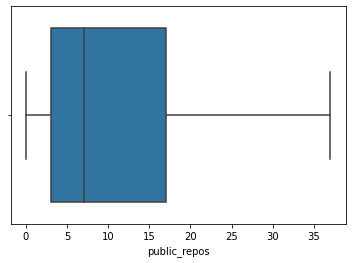

In [21]:
 sns.boxplot(unique_users_github_filtered['public_repos'], showfliers = False)
unique_users_github_filtered.sort_values('public_repos', ascending=False).head(10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,github_user_id,uu_user_id,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,...,disk_usage,collaborators,two_factor_authentication,plan,is_student,is_employee,is_currently_employed,is_research_group,final_decision,note
69,brentp,NaN,1739.0,MDQ6VXNlcjE3Mzk=,https://avatars.githubusercontent.com/u/1739?v=4,NaN,https://api.github.com/users/brentp,https://github.com/brentp,https://api.github.com/users/brentp/followers,https://api.github.com/users/brentp/following{...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,UMC
85,ekatrukha,YKatrukha,779131.0,MDQ6VXNlcjc3OTEzMQ==,https://avatars.githubusercontent.com/u/779131...,NaN,https://api.github.com/users/ekatrukha,https://github.com/ekatrukha,https://api.github.com/users/ekatrukha/followers,https://api.github.com/users/ekatrukha/followi...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1,NaN
103,daob,NaN,65516.0,MDQ6VXNlcjY1NTE2,https://avatars.githubusercontent.com/u/65516?v=4,NaN,https://api.github.com/users/daob,https://github.com/daob,https://api.github.com/users/daob/followers,https://api.github.com/users/daob/following{/o...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
27,J535D165,JdeBruin1,12981139.0,MDQ6VXNlcjEyOTgxMTM5,https://avatars.githubusercontent.com/u/129811...,NaN,https://api.github.com/users/J535D165,https://github.com/J535D165,https://api.github.com/users/J535D165/followers,https://api.github.com/users/J535D165/followin...,...,1493449.0,0.0,1.0,- name: free\n- space: 976562499\n- collaborat...,False,1.0,1.0,0.0,1,NaN
140,norm2782,NaN,19933.0,MDQ6VXNlcjE5OTMz,https://avatars.githubusercontent.com/u/19933?v=4,NaN,https://api.github.com/users/norm2782,https://github.com/norm2782,https://api.github.com/users/norm2782/followers,https://api.github.com/users/norm2782/followin...,...,NaN,NaN,NaN,NaN,False,1.0,0.0,0.0,1,former employee
253,japhir,NaN,10659193.0,MDQ6VXNlcjEwNjU5MTkz,https://avatars.githubusercontent.com/u/106591...,NaN,https://api.github.com/users/japhir,https://github.com/japhir,https://api.github.com/users/japhir/followers,https://api.github.com/users/japhir/following{...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
79,wouter-swierstra,NaN,1588245.0,MDQ6VXNlcjE1ODgyNDU=,https://avatars.githubusercontent.com/u/158824...,NaN,https://api.github.com/users/wouter-swierstra,https://github.com/wouter-swierstra,https://api.github.com/users/wouter-swierstra/...,https://api.github.com/users/wouter-swierstra/...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
87,AJueling,NaN,20947797.0,MDQ6VXNlcjIwOTQ3Nzk3,https://avatars.githubusercontent.com/u/209477...,NaN,https://api.github.com/users/AJueling,https://github.com/AJueling,https://api.github.com/users/AJueling/followers,https://api.github.com/users/AJueling/followin...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,NaN
34,leonardovida,LJVida,2588282.0,MDQ6VXNlcjI1ODgyODI=,https://avatars.githubusercontent.com/u/258828...,NaN,https://api.github.com/users/leonardovida,https://github.com/leonardovida,https://api.github.com/users/leonardovida/foll...,https://api.github.com/users/leonardovida/foll...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,NaN
113,davidcortesortuno,DICOCortesOrtuno,12200541.0,MDQ6VXNlcjEyMjAwNTQx,https://avatars.githubusercontent.com/u/122005...,NaN,https://api.github.com/users/davidcortesortuno,https://github.com/davidcortesortuno,https://api.github.com/users/davidcortesortuno...,https://api.github.com/users/davidcortesortuno...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1,NaN


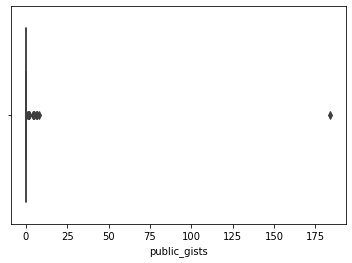

In [22]:
sns.boxplot(unique_users_github_filtered['public_gists'])
unique_users_github_filtered.sort_values('public_gists', ascending=False).head(10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,github_user_id,uu_user_id,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,...,disk_usage,collaborators,two_factor_authentication,plan,is_student,is_employee,is_currently_employed,is_research_group,final_decision,note
69,brentp,NaN,1739.0,MDQ6VXNlcjE3Mzk=,https://avatars.githubusercontent.com/u/1739?v=4,NaN,https://api.github.com/users/brentp,https://github.com/brentp,https://api.github.com/users/brentp/followers,https://api.github.com/users/brentp/following{...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,UMC
27,J535D165,JdeBruin1,12981139.0,MDQ6VXNlcjEyOTgxMTM5,https://avatars.githubusercontent.com/u/129811...,NaN,https://api.github.com/users/J535D165,https://github.com/J535D165,https://api.github.com/users/J535D165/followers,https://api.github.com/users/J535D165/followin...,...,1493449.0,0.0,1.0,- name: free\n- space: 976562499\n- collaborat...,False,1.0,1.0,0.0,1,NaN
423,stefvanbuuren,NaN,3919919.0,MDQ6VXNlcjM5MTk5MTk=,https://avatars.githubusercontent.com/u/391991...,NaN,https://api.github.com/users/stefvanbuuren,https://github.com/stefvanbuuren,https://api.github.com/users/stefvanbuuren/fol...,https://api.github.com/users/stefvanbuuren/fol...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
79,wouter-swierstra,NaN,1588245.0,MDQ6VXNlcjE1ODgyNDU=,https://avatars.githubusercontent.com/u/158824...,NaN,https://api.github.com/users/wouter-swierstra,https://github.com/wouter-swierstra,https://api.github.com/users/wouter-swierstra/...,https://api.github.com/users/wouter-swierstra/...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
92,jbikker,NaN,22001552.0,MDQ6VXNlcjIyMDAxNTUy,https://avatars.githubusercontent.com/u/220015...,NaN,https://api.github.com/users/jbikker,https://github.com/jbikker,https://api.github.com/users/jbikker/followers,https://api.github.com/users/jbikker/following...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1,NaN
140,norm2782,NaN,19933.0,MDQ6VXNlcjE5OTMz,https://avatars.githubusercontent.com/u/19933?v=4,NaN,https://api.github.com/users/norm2782,https://github.com/norm2782,https://api.github.com/users/norm2782/followers,https://api.github.com/users/norm2782/followin...,...,NaN,NaN,NaN,NaN,False,1.0,0.0,0.0,1,former employee
10,cjvanlissa,CJvanLissa,11941251.0,MDQ6VXNlcjExOTQxMjUx,https://avatars.githubusercontent.com/u/119412...,NaN,https://api.github.com/users/cjvanlissa,https://github.com/cjvanlissa,https://api.github.com/users/cjvanlissa/followers,https://api.github.com/users/cjvanlissa/follow...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
240,PABalland,NaN,19231966.0,MDQ6VXNlcjE5MjMxOTY2,https://avatars.githubusercontent.com/u/192319...,NaN,https://api.github.com/users/PABalland,https://github.com/PABalland,https://api.github.com/users/PABalland/followers,https://api.github.com/users/PABalland/followi...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,NaN
74,alexandrosstergiou,AGStergiou,25504317.0,MDQ6VXNlcjI1NTA0MzE3,https://avatars.githubusercontent.com/u/255043...,NaN,https://api.github.com/users/alexandrosstergiou,https://github.com/alexandrosstergiou,https://api.github.com/users/alexandrosstergio...,https://api.github.com/users/alexandrosstergio...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,NaN
26,bozso,IBoszo,15000107.0,MDQ6VXNlcjE1MDAwMTA3,https://avatars.githubusercontent.com/u/150001...,NaN,https://api.github.com/users/bozso,https://github.com/bozso,https://api.github.com/users/bozso/followers,https://api.github.com/users/bozso/following{/...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1,NaN


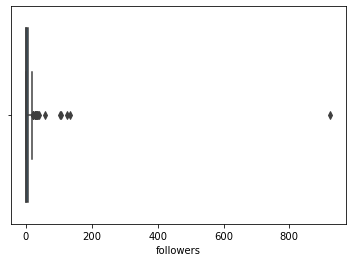

In [23]:
sns.boxplot(unique_users_github_filtered['followers'])
unique_users_github_filtered.sort_values('followers', ascending=False).head(10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,github_user_id,uu_user_id,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,...,disk_usage,collaborators,two_factor_authentication,plan,is_student,is_employee,is_currently_employed,is_research_group,final_decision,note
26,bozso,IBoszo,15000107.0,MDQ6VXNlcjE1MDAwMTA3,https://avatars.githubusercontent.com/u/150001...,NaN,https://api.github.com/users/bozso,https://github.com/bozso,https://api.github.com/users/bozso/followers,https://api.github.com/users/bozso/following{/...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1,NaN
69,brentp,NaN,1739.0,MDQ6VXNlcjE3Mzk=,https://avatars.githubusercontent.com/u/1739?v=4,NaN,https://api.github.com/users/brentp,https://github.com/brentp,https://api.github.com/users/brentp/followers,https://api.github.com/users/brentp/following{...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,UMC
27,J535D165,JdeBruin1,12981139.0,MDQ6VXNlcjEyOTgxMTM5,https://avatars.githubusercontent.com/u/129811...,NaN,https://api.github.com/users/J535D165,https://github.com/J535D165,https://api.github.com/users/J535D165/followers,https://api.github.com/users/J535D165/followin...,...,1493449.0,0.0,1.0,- name: free\n- space: 976562499\n- collaborat...,False,1.0,1.0,0.0,1,NaN
9,bricker0,BARicker,1919662.0,MDQ6VXNlcjE5MTk2NjI=,https://avatars.githubusercontent.com/u/191966...,NaN,https://api.github.com/users/bricker0,https://github.com/bricker0,https://api.github.com/users/bricker0/followers,https://api.github.com/users/bricker0/followin...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
20,hanneoberman,HIOberman,38891540.0,MDQ6VXNlcjM4ODkxNTQw,https://avatars.githubusercontent.com/u/388915...,NaN,https://api.github.com/users/hanneoberman,https://github.com/hanneoberman,https://api.github.com/users/hanneoberman/foll...,https://api.github.com/users/hanneoberman/foll...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,NaN
34,leonardovida,LJVida,2588282.0,MDQ6VXNlcjI1ODgyODI=,https://avatars.githubusercontent.com/u/258828...,NaN,https://api.github.com/users/leonardovida,https://github.com/leonardovida,https://api.github.com/users/leonardovida/foll...,https://api.github.com/users/leonardovida/foll...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,NaN
59,bmatern,NaN,14239618.0,MDQ6VXNlcjE0MjM5NjE4,https://avatars.githubusercontent.com/u/142396...,NaN,https://api.github.com/users/bmatern,https://github.com/bmatern,https://api.github.com/users/bmatern/followers,https://api.github.com/users/bmatern/following...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,"UMC = UU, right?"
253,japhir,NaN,10659193.0,MDQ6VXNlcjEwNjU5MTkz,https://avatars.githubusercontent.com/u/106591...,NaN,https://api.github.com/users/japhir,https://github.com/japhir,https://api.github.com/users/japhir/followers,https://api.github.com/users/japhir/following{...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
93,MycrofD,NaN,7660380.0,MDQ6VXNlcjc2NjAzODA=,https://avatars.githubusercontent.com/u/766038...,NaN,https://api.github.com/users/MycrofD,https://github.com/MycrofD,https://api.github.com/users/MycrofD/followers,https://api.github.com/users/MycrofD/following...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1,NaN
87,AJueling,NaN,20947797.0,MDQ6VXNlcjIwOTQ3Nzk3,https://avatars.githubusercontent.com/u/209477...,NaN,https://api.github.com/users/AJueling,https://github.com/AJueling,https://api.github.com/users/AJueling/followers,https://api.github.com/users/AJueling/followin...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,NaN


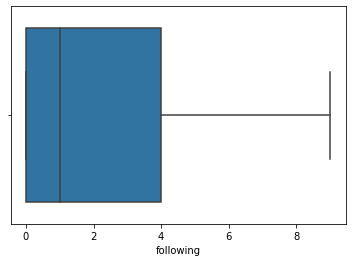

In [24]:
sns.boxplot(unique_users_github_filtered['following'], showfliers = False)
unique_users_github_filtered.sort_values('following', ascending=False).head(10)


,github_user_id,uu_user_id,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,...,disk_usage,collaborators,two_factor_authentication,plan,is_student,is_employee,is_currently_employed,is_research_group,final_decision,note
69,brentp,NaN,1739.0,MDQ6VXNlcjE3Mzk=,https://avatars.githubusercontent.com/u/1739?v=4,NaN,https://api.github.com/users/brentp,https://github.com/brentp,https://api.github.com/users/brentp/followers,https://api.github.com/users/brentp/following{...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,UMC
27,J535D165,JdeBruin1,12981139.0,MDQ6VXNlcjEyOTgxMTM5,https://avatars.githubusercontent.com/u/129811...,NaN,https://api.github.com/users/J535D165,https://github.com/J535D165,https://api.github.com/users/J535D165/followers,https://api.github.com/users/J535D165/followin...,...,1493449.0,0.0,1.0,- name: free\n- space: 976562499\n- collaborat...,False,1.0,1.0,0.0,1,NaN
423,stefvanbuuren,NaN,3919919.0,MDQ6VXNlcjM5MTk5MTk=,https://avatars.githubusercontent.com/u/391991...,NaN,https://api.github.com/users/stefvanbuuren,https://github.com/stefvanbuuren,https://api.github.com/users/stefvanbuuren/fol...,https://api.github.com/users/stefvanbuuren/fol...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
79,wouter-swierstra,NaN,1588245.0,MDQ6VXNlcjE1ODgyNDU=,https://avatars.githubusercontent.com/u/158824...,NaN,https://api.github.com/users/wouter-swierstra,https://github.com/wouter-swierstra,https://api.github.com/users/wouter-swierstra/...,https://api.github.com/users/wouter-swierstra/...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
92,jbikker,NaN,22001552.0,MDQ6VXNlcjIyMDAxNTUy,https://avatars.githubusercontent.com/u/220015...,NaN,https://api.github.com/users/jbikker,https://github.com/jbikker,https://api.github.com/users/jbikker/followers,https://api.github.com/users/jbikker/following...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1,NaN
140,norm2782,NaN,19933.0,MDQ6VXNlcjE5OTMz,https://avatars.githubusercontent.com/u/19933?v=4,NaN,https://api.github.com/users/norm2782,https://github.com/norm2782,https://api.github.com/users/norm2782/followers,https://api.github.com/users/norm2782/followin...,...,NaN,NaN,NaN,NaN,False,1.0,0.0,0.0,1,former employee
10,cjvanlissa,CJvanLissa,11941251.0,MDQ6VXNlcjExOTQxMjUx,https://avatars.githubusercontent.com/u/119412...,NaN,https://api.github.com/users/cjvanlissa,https://github.com/cjvanlissa,https://api.github.com/users/cjvanlissa/followers,https://api.github.com/users/cjvanlissa/follow...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,NaN,1,NaN
240,PABalland,NaN,19231966.0,MDQ6VXNlcjE5MjMxOTY2,https://avatars.githubusercontent.com/u/192319...,NaN,https://api.github.com/users/PABalland,https://github.com/PABalland,https://api.github.com/users/PABalland/followers,https://api.github.com/users/PABalland/followi...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,NaN
74,alexandrosstergiou,AGStergiou,25504317.0,MDQ6VXNlcjI1NTA0MzE3,https://avatars.githubusercontent.com/u/255043...,NaN,https://api.github.com/users/alexandrosstergiou,https://github.com/alexandrosstergiou,https://api.github.com/users/alexandrosstergio...,https://api.github.com/users/alexandrosstergio...,...,NaN,NaN,NaN,NaN,False,1.0,1.0,0.0,1,NaN
26,bozso,IBoszo,15000107.0,MDQ6VXNlcjE1MDAwMTA3,https://avatars.githubusercontent.com/u/150001...,NaN,https://api.github.com/users/bozso,https://github.com/bozso,https://api.github.com/users/bozso/followers,https://api.github.com/users/bozso/following{/...,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1,NaN
